# Assignment:

1. Perform some movie recommendations and analysis for user 2:
- How many movies has this user watched?
- Plot a bar chart of their movie ratings. The bar chart should be the counts of the number of unique ratings.
    - Hint: the `sort_index()` function from pandas might be helpful to make the bar plot look nicer.
- What are some of user 2's top movies?
    - Hint: to get the actual movie titles, you can use pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function, although using the movie IDs is OK too.
- Find the most similar user in the movielens dataset to user 2 using at least 2 distance metrics. Be sure to use cosine distance as one of your choices.
- Recommend a few movies for user 2 using similarity metrics.
- Do the recommendations from this method make sense?
- Write a short analysis of the results, and justify which similarity metric(s) you used.

Optional challenges:
- Perform other analyses (e.g. EDA, visualizations) of the movies watched from this dataset, or from a bigger part of the dataset for the movielens dataset: https://grouplens.org/datasets/movielens/
- Add yourself as a user in the data with ratings for movies you've watched, and find recommendations for next movies to watch. 
- Use a more advanced collaborative or content-based recommender to make recommendations (e.g. using the surprise package in Python)
    - Try making predictions for user 2. How do they compare with our basic model?
    - Add your own movie ratings, or use another recommender dataset and add your own preferences, then get recommendations for yourself

In [1]:
import pandas as pd
movies = pd.read_csv('./movies.csv')
ratings = pd.read_csv('./ratings.csv')

In [6]:
# How many movies has this guy watched?
ratings.loc[ratings['userId'] == 2].groupby('userId').count()

# Looks like he's got 29 reviews

,movieId,rating,timestamp
userId,,,
2,29,29,29


<AxesSubplot:xlabel='movieId'>

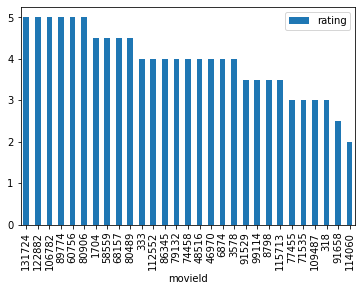

In [26]:
# Plot a bar chart of their movie ratings. The bar chart should be the counts of the
# number of unique ratings.
ratings.loc[ratings['userId'] == 2].sort_values('rating', ascending=False).plot(kind='bar', x='movieId', y='rating')

In [30]:
# What are some of user 2's top movies?
#Hint: to get the actual movie titles, you can use pandas merge function, although using 
    # the movie IDs is OK too.

ratings.loc[(ratings['userId'] == 2) & (ratings['rating'] == 5)].merge(movies, on='movieId')

,userId,movieId,rating,timestamp,title,genres
0,2,60756,5.0,1445714980,Step Brothers (2008),Comedy
1,2,80906,5.0,1445715172,Inside Job (2010),Documentary
2,2,89774,5.0,1445715189,Warrior (2011),Drama
3,2,106782,5.0,1445714966,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama
4,2,122882,5.0,1445715272,Mad Max: Fury Road (2015),Action|Adventure|Sci-Fi|Thriller
5,2,131724,5.0,1445714851,The Jinx: The Life and Deaths of Robert Durst ...,Documentary


In [47]:
# Find the most similar user in the movielens dataset to user 2 using at least 2
# distance metrics. Be sure to use cosine distance as one of your choices.

# Okay first I need to pivot it out
pivoted = ratings.pivot(index='userId', columns='movieId', values='rating')
pivoted.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Euclidean distance
from scipy.spatial.distance import euclidean
euclid_corr = pivoted.T.corr(method=euclidean)

euclid_corr[2].sort_values(ascending=False).head(10)

# Looks like userId 153 and 41 are tied for the bets and 139 very barely below.

userId
153    6.837397
41     6.837397
139    6.224950
414    5.852350
517    5.830952
15     5.766281
461    5.634714
328    5.634714
305    5.522681
298    5.220153
Name: 2, dtype: float64

In [53]:
# Cosine distance
from scipy.spatial.distance import cosine
cosine_corr = pivoted.T.corr(method=cosine)

cosine_corr[2].sort_values(ascending=False).head(10)

# Using cosine it looks like 517, 153, then 7 are the top. Only 153 is shared

userId
2      1.000000
517    0.255092
153    0.214824
7      0.201478
391    0.183342
10     0.160946
443    0.151273
135    0.145801
559    0.145801
461    0.142544
Name: 2, dtype: float64

In [137]:
# Pearson correlation
pearson_corr = pivoted.T.corr()

pearson_corr[2].sort_values(ascending=False).head(20)

# Quite a few 1.00... none shared with the above distance metrics of course!

userId
2      1.000000
341    1.000000
93     1.000000
143    1.000000
148    1.000000
240    1.000000
34     1.000000
33     1.000000
60     1.000000
313    1.000000
363    1.000000
370    1.000000
416    1.000000
51     1.000000
196    0.944911
548    0.866025
376    0.866025
246    0.807573
381    0.789474
326    0.706366
Name: 2, dtype: float64

In [163]:
# Recommend a few movies for user 2 using similarity metrics.

# Here is my function to do so for all 3 for any userid
# it also prints out movies ratd 5 by the userId so I can see if my recs make sense
def RecommendTop3(target_id, distance_method):
    # Make sure we have this to use
    pivoted = ratings.pivot(index='userId', columns='movieId', values='rating')

    # What does the targetlike?
    print(f'Movies rated 5 by userId {target_id}')
    rated5 = ratings.loc[(ratings['userId'] == target_id) & (ratings['rating'] == 5)]
    rated5 = rated5.merge(movies, on='movieId')
    print(rated5[['title', 'genres']].head(20))
    
    # Correlation matrix depending on input
    if distance_method == 'euclidean':
        # Euclidean distance
        from scipy.spatial.distance import euclidean
        corr = pivoted.T.corr(method=euclidean)
    elif distance_method == 'cosine':
        # Cosine distance
        from scipy.spatial.distance import cosine
        corr = pivoted.T.corr(method=cosine)
    elif distance_method == 'pearson':
        # Pearson correlation
        corr = pivoted.T.corr()
    
    # Find the top 10 similar userIds
    top = pd.DataFrame(corr[target_id].sort_values(ascending=False)) #Sort by correlation
    top = top.reset_index() # Reset index
    top = top.iloc[1:11] # Take top 10 (#1 is target)
    
    # Sort movies by average score desc, # of ratings desc
    rec = top.merge(ratings, on='userId') # merge tables
    
    # Remove movies seen by target already
    targ_seenids = pd.DataFrame(ratings.loc[ratings['userId'] == target_id]['movieId'])
    rec = rec.loc[~rec['movieId'].isin(targ_seenids['movieId'])]    
    rec = rec.groupby('movieId')['rating'].agg(['mean', 'count']) #aggregate, take sum/count
    
    # talk
    print('')
    print(f'Top 3 movie recomendations for userId {target_id} using {distance_method} distance.')
    print(rec.sort_values(['mean', 'count'], ascending=False).merge(movies, on='movieId').iloc[:3][['title', 'genres']])
    
    

In [164]:
RecommendTop3(2, 'cosine')

Movies rated 5 by userId 2
                                               title  \
0                               Step Brothers (2008)   
1                                  Inside Job (2010)   
2                                     Warrior (2011)   
3                    Wolf of Wall Street, The (2013)   
4                          Mad Max: Fury Road (2015)   
5  The Jinx: The Life and Deaths of Robert Durst ...   

                             genres  
0                            Comedy  
1                       Documentary  
2                             Drama  
3                Comedy|Crime|Drama  
4  Action|Adventure|Sci-Fi|Thriller  
5                       Documentary  

Top 3 movie recomendations for userId 2 using cosine distance.
                                               title  \
0  Like Water for Chocolate (Como agua para choco...   
1                         Sound of Music, The (1965)   
2                         Princess Bride, The (1987)   

                         

In [165]:
RecommendTop3(2, 'pearson')

Movies rated 5 by userId 2
                                               title  \
0                               Step Brothers (2008)   
1                                  Inside Job (2010)   
2                                     Warrior (2011)   
3                    Wolf of Wall Street, The (2013)   
4                          Mad Max: Fury Road (2015)   
5  The Jinx: The Life and Deaths of Robert Durst ...   

                             genres  
0                            Comedy  
1                       Documentary  
2                             Drama  
3                Comedy|Crime|Drama  
4  Action|Adventure|Sci-Fi|Thriller  
5                       Documentary  

Top 3 movie recomendations for userId 2 using pearson distance.
                                 title                 genres
0              Schindler's List (1993)              Drama|War
1     Silence of the Lambs, The (1991)  Crime|Horror|Thriller
2  There's Something About Mary (1998)         Comedy|Romance


In [166]:
RecommendTop3(2, 'euclidean')

Movies rated 5 by userId 2
                                               title  \
0                               Step Brothers (2008)   
1                                  Inside Job (2010)   
2                                     Warrior (2011)   
3                    Wolf of Wall Street, The (2013)   
4                          Mad Max: Fury Road (2015)   
5  The Jinx: The Life and Deaths of Robert Durst ...   

                             genres  
0                            Comedy  
1                       Documentary  
2                             Drama  
3                Comedy|Crime|Drama  
4  Action|Adventure|Sci-Fi|Thriller  
5                       Documentary  

Top 3 movie recomendations for userId 2 using euclidean distance.
                                 title       genres
0                 Carlito's Way (1993)  Crime|Drama
1  Monty Python's Life of Brian (1979)       Comedy
2                  12 Angry Men (1957)        Drama


In [27]:
# Do the recommendations from this method make sense?
# Write a short analysis of the results, and justify which similarity metric(s) you used.

# Analysis/Summary

For both parts of the assignment, write a short analysis and summary of what you did, the results, and the significance. Do this in a markdown cell here at the bottom, like this one.

In [168]:
%%markdown
Okay so... I don't watch many movies, so I'm not 100% sure if these are similar recommendations. It seems like the cosine estimation however recommended mostly genres that weren't rated 5 by 
userId 2, while the others had genres more inline. userId 2 didn't rate a single romance genred movie a 5, yet all of the top 3 were romance movies. So I'd probably choose one of the other two
for this situation. It was an interesting analysis - if I was going to do this myself I'd have probably approached it more as a prediction model, trying to forecast what a user would rate (and 
therefore like/dislike) based on past ratings. Not sure how different that really is in the long grand scheme of things.

Okay so... I don't watch many movies, so I'm not 100% sure if these are similar recommendations. It seems like the cosine estimation however recommended mostly genres that weren't rated 5 by 
userId 2, while the others had genres more inline. userId 2 didn't rate a single romance genred movie a 5, yet all of the top 3 were romance movies. So I'd probably choose one of the other two
for this situation. It was an interesting analysis - if I was going to do this myself I'd have probably approached it more as a prediction model, trying to forecast what a user would rate (and 
therefore like/dislike) based on past ratings. Not sure how different that really is in the long grand scheme of things.
